# Unit 5 - Financial Planning

In [96]:
# Initial imports
import json
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [97]:
def conf_calc(df,invest):
    """
    Read in a Monte Carlo object, and calculate confidence intervals based on investment input
    Args:
        path : The dataframe name and investment amount
    Returns:
        Prints the sentence of 95% chance of high or low forecast dollar amount
    """
    ci_lower = round(df[8]*invest,2)
    ci_upper = round(df[9]*invest,2)
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
    print(f"There is a 95% chance that an initial investment of ${invest} in the portfolio"
          f" over the next 30 years will end within in the range of"
          f" ${ci_lower} and ${ci_upper}")

In [98]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [99]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [100]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [101]:
# Fetch current BTC price
# Get
btc_request = requests.get(btc_url).json()
btc_price=btc_request['data']['1']['quotes']['CAD']['price']
# Fetch current ETH price
# Get request
eth_request = requests.get(eth_url).json()
eth_price=eth_request['data']['1027']['quotes']['CAD']['price']
# Compute current value of my crypto
my_btc_value=btc_price*my_btc
my_eth_value=eth_price*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $75034.83
The current value of your 5.3 ETH is $27267.92


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [102]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [103]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [104]:
# Format current date as ISO format
start_date = pd.Timestamp("2015-08-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-12-11", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df

# Preview DataFrame
df_portfolio.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-12-20 00:00:00-05:00  108.75  108.880  108.7059  108.770  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.870  108.7300  108.830  2173058.0   
2017-12-22 00:00:00-05:00  108.82  108.890  108.8100  108.880  2952430.0   
2017-12-26 00:00:00-05:00  108.91  109.010  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.325  109.0200  109.285  1863189.0   

                              SPY                                        
                             open     high      low   close      volume  
time                                                                     
2017-12-20 00:00:00-05:00     NaN      NaN      NaN     NaN         NaN  
2017-12-21 00:00:00-05:00  267.73  268.385  267.300  267.57  34999954.0  
2017-12-22 00:00:00-05:00  267.60  267.635  266.900  267.48  36604044.0  
2017-12-26 00:00:00-05:00  267.06  267.390  266.885  267.17  24888478.0  
2017-12-27 00:00:00-05:00  267.36  267.730  267.010  267.33  32573906.0

In [105]:
# Pick AGG and SPY close prices
agg_close_price=float(df_portfolio.iloc[-1]['AGG']['close'])
spy_close_price=float(df_portfolio.iloc[-1]['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.24
Current SPY closing price: $470.72


In [106]:
# Compute the current value of shares
my_spy_value=my_spy*spy_close_price
my_agg_value=my_agg*agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23536.00
The current value of your 200 AGG shares is $22848.00


### Savings Health Analysis

In [107]:
# Set monthly household income
monthly_income=12000
index=["Crypto","Shares"]

# Consolidate financial assets data
crypto=my_btc_value+my_eth_value
shares=my_spy_value+my_agg_value
values_data={
    "amount":[crypto,shares]
}

# Create savings DataFrame
df_savings=pd.DataFrame(values_data,index=index)
# Display savings DataFrame
display(df_savings)

,amount
Crypto,102302.744115
Shares,46384.000000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

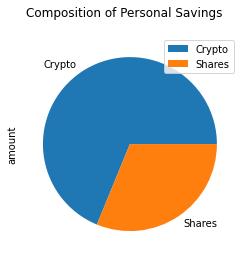

In [108]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True,title="Composition of Personal Savings")

In [109]:
# Set ideal emergency fund
emergency_fund = monthly_income

# Calculate total amount of savings
total_savings=crypto+shares

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations of having enough money for emergency")
elif total_savings==emergency_fund:
    print("Congratulations on meeting your financial goal")
else:
    goal=emergency_fund-total_savings
    print(f"You are away {goal} from your goal")
    


Congratulations of having enough money for emergency


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [110]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-12-10', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-10', tz='America/New_York').isoformat()

In [111]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

tickers = ["SPY","AGG"]
# Display sample data
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-12-20 00:00:00-05:00  108.75  108.880  108.7059  108.770  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.870  108.7300  108.830  2173058.0   
2017-12-22 00:00:00-05:00  108.82  108.890  108.8100  108.880  2952430.0   
2017-12-26 00:00:00-05:00  108.91  109.010  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.325  109.0200  109.285  1863189.0   

                              SPY                                        
                             open     high      low   close      volume  
time                                                                     
2017-12-20 00:00:00-05:00     NaN      NaN      NaN     NaN         NaN  
2017-12-21 00:00:00-05:00  267.73  268.385  267.300  267.57  34999954.0  
2017-12-22 00:00:00-05:00  267.60  267.635  266.900  267.48  36604044.0  
2017-12-26 00:00:00-05:00  267.06  267.390  266.885  267.17  24888478.0  
2017-12-27 00:00:00-05:00  267.36  267.730  267.010  267.33  32573906.0

In [112]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_dist = MCSimulation(
    df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30
)
# Print the simulation input data
MC_dist.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-12-20 00:00:00-05:00  108.75  108.880  108.7059  108.770  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.870  108.7300  108.830  2173058.0   
2017-12-22 00:00:00-05:00  108.82  108.890  108.8100  108.880  2952430.0   
2017-12-26 00:00:00-05:00  108.91  109.010  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.325  109.0200  109.285  1863189.0   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-12-20 00:00:00-05:00          NaN     NaN      NaN      NaN     NaN   
2017-12-21 00:00:00-05:00     0.000552  267.73  268.385  267.300  267.57   
2017-12-22 00:00:00-05:00     0.000459  267.60  267.635  266.900  267.48   
2017-12-26 00:00:00-05:00     0.000735  267.06  267.390  266.885  267.17   
2017-12-27 00:00:00-05:00     0.002983  267.36  267.730  267.010  267.33   

                                                    
                               volume daily_return  
time                                                
2017-12-20 00:00:00-05:00         NaN          NaN  
2017-12-21 00:00:00-05:00  34999954.0          NaN  
2017-12-22 00:00:00-05:00  36604044.0    -0.000336  
2017-12-26 00:00:00-05:00  24888478.0    -0.001159  
2017-12-27 00:00:00-05:00  32573906.0     0.000599

In [113]:
# Printing the simulation input data
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ironcommander\Desktop\school\financial_planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995975,1.005757,1.007974,1.003843,0.995266,1.001476,1.004362,1.002206,0.996840,0.992551,...,0.995949,0.998729,0.999374,0.986984,0.999865,0.996818,1.000125,0.996632,1.002932,1.003986
2,0.995395,1.009509,1.010100,0.999565,1.011587,1.004753,1.006161,1.005061,0.996607,0.988783,...,1.012785,1.001517,0.994521,0.990578,1.007197,1.001030,0.996031,0.986625,1.001885,1.004731
3,1.008112,1.006612,1.010876,1.002967,1.018887,1.005935,1.006596,1.004083,0.991255,0.994443,...,1.012586,0.997370,0.995786,0.982605,1.006448,1.005479,0.992872,0.989708,1.012569,1.006717
4,1.000728,1.000972,1.011206,1.004554,1.014356,1.004839,1.014381,1.008649,0.985958,0.987214,...,1.013999,1.007237,0.989139,0.985083,1.016887,1.008048,0.988220,0.988614,1.017935,1.004243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.968232,22.981569,4.377068,6.065193,15.921117,18.162889,9.673080,13.919070,12.655400,13.675119,...,6.434872,9.847396,11.372645,4.938196,9.669005,6.784818,5.968546,6.114888,13.548956,7.347363
7557,7.030705,23.009233,4.389466,6.095193,15.917474,18.195606,9.698086,13.890250,12.813029,13.595480,...,6.499641,9.876297,11.447994,4.950551,9.604223,6.808717,5.987614,6.081768,13.608602,7.383586
7558,7.039936,23.139385,4.368880,6.141839,15.784813,18.029602,9.728060,14.007366,12.864362,13.671198,...,6.576420,9.858570,11.332787,4.960880,9.570225,6.781902,6.016723,6.148425,13.595538,7.443342
7559,7.059710,22.951638,4.357481,6.142403,15.702078,18.108206,9.725477,14.166752,12.924618,13.685529,...,6.518600,9.954539,11.373704,4.900277,9.574087,6.800770,6.005913,6.093149,13.528771,7.419892


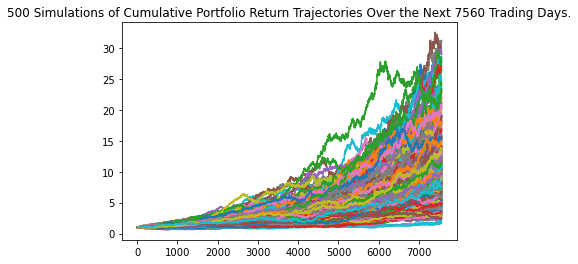

In [114]:
# Plot simulation outcomes
line_plot=MC_dist.plot_simulation()

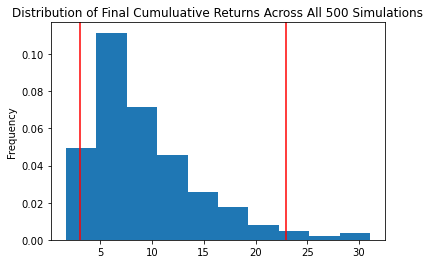

In [115]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [116]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_dist.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              9.346290
std               5.255125
min               1.680351
25%               5.466650
50%               7.907712
75%              11.835135
max              31.069482
95% CI Lower      3.052949
95% CI Upper     22.982953
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [117]:
# Set initial investment
initial_investment=20000
#use confidence interval calculator method
conf_calc(tbl,initial_investment)

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $61058.98 and $459659.05


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [118]:
# Set initial investment
initial_investment = 20000 * 1.5
#use confidence interval calculator method
conf_calc(tbl,initial_investment)


There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $91588.47 and $689488.58


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [119]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_5 = MCSimulation(
    df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*5
)
# Print the simulation input data
MC_dist_5.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-12-20 00:00:00-05:00  108.75  108.880  108.7059  108.770  3123756.0   
2017-12-21 00:00:00-05:00  108.76  108.870  108.7300  108.830  2173058.0   
2017-12-22 00:00:00-05:00  108.82  108.890  108.8100  108.880  2952430.0   
2017-12-26 00:00:00-05:00  108.91  109.010  108.8700  108.960  1717408.0   
2017-12-27 00:00:00-05:00  109.02  109.325  109.0200  109.285  1863189.0   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2017-12-20 00:00:00-05:00          NaN     NaN      NaN      NaN     NaN   
2017-12-21 00:00:00-05:00     0.000552  267.73  268.385  267.300  267.57   
2017-12-22 00:00:00-05:00     0.000459  267.60  267.635  266.900  267.48   
2017-12-26 00:00:00-05:00     0.000735  267.06  267.390  266.885  267.17   
2017-12-27 00:00:00-05:00     0.002983  267.36  267.730  267.010  267.33   

                                                    
                               volume daily_return  
time                                                
2017-12-20 00:00:00-05:00         NaN          NaN  
2017-12-21 00:00:00-05:00  34999954.0          NaN  
2017-12-22 00:00:00-05:00  36604044.0    -0.000336  
2017-12-26 00:00:00-05:00  24888478.0    -0.001159  
2017-12-27 00:00:00-05:00  32573906.0     0.000599

In [120]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ironcommander\Desktop\school\financial_planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000802,1.002073,0.999993,1.003258,0.991226,1.004629,1.002054,0.992004,1.003670,1.005802,...,1.007994,0.995176,0.998316,1.001947,1.000163,0.996496,1.000284,1.004675,0.995027,1.002783
2,1.013042,0.997672,0.998571,1.009269,0.995005,1.008170,1.002322,0.995364,1.003493,1.011086,...,1.013510,1.006101,0.996044,0.998117,0.996669,0.998324,1.001622,0.999282,0.997501,0.999918
3,1.017568,0.993357,1.003048,0.999855,1.000795,1.005024,0.999510,0.994803,1.001796,1.015241,...,1.015574,1.003028,0.991339,1.001705,0.998073,1.002984,0.998296,0.989517,1.000146,1.008013
4,1.018811,0.989262,0.995754,0.997961,1.005509,1.000388,0.995433,0.984267,1.000479,1.029250,...,1.010862,1.010464,0.994140,1.006764,0.987425,1.008662,0.990410,0.994448,1.001673,1.006614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.563991,1.323559,1.126867,1.010561,1.687368,1.308245,1.421842,1.654267,1.540189,1.603791,...,1.247006,1.491538,1.742804,1.302682,1.554405,1.345233,1.753897,1.438075,1.822264,1.557526
1257,1.558119,1.325696,1.126235,1.011818,1.681507,1.308080,1.442090,1.657679,1.538911,1.606044,...,1.242175,1.486839,1.719243,1.299811,1.557175,1.345929,1.774215,1.443038,1.824965,1.559728
1258,1.561574,1.327771,1.128569,1.016827,1.697715,1.306709,1.441729,1.669039,1.537934,1.610123,...,1.237833,1.491542,1.712934,1.309111,1.546581,1.354501,1.764273,1.439428,1.837565,1.554374
1259,1.555018,1.338926,1.120392,1.007779,1.700110,1.296703,1.459027,1.676774,1.530030,1.606948,...,1.227843,1.490278,1.703177,1.306227,1.542102,1.360325,1.749929,1.436344,1.848368,1.554247


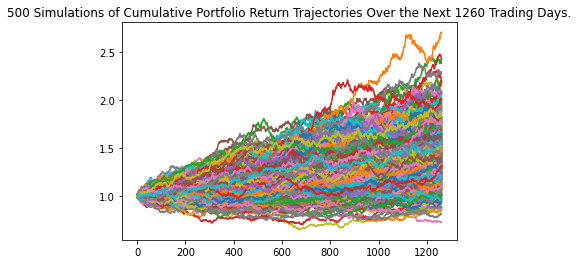

In [121]:
# Plot simulation outcomes
plot_line=MC_dist_5.plot_simulation() 

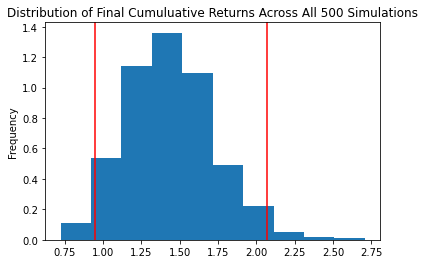

In [122]:
# Plot probability distribution and confidence intervals
plot_dist=MC_dist_5.plot_distribution()

In [123]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5 = MC_dist_5.summarize_cumulative_return()
# Print summary statistics
print(tbl_5)

count           500.000000
mean              1.438157
std               0.289413
min               0.723683
25%               1.236203
50%               1.420842
75%               1.610128
max               2.707772
95% CI Lower      0.951156
95% CI Upper      2.066896
Name: 1260, dtype: float64


In [125]:
# Set initial investment
initial_invest=60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# Print results
conf_calc(tbl_5,initial_invest)


There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $57069.34 and $124013.79


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


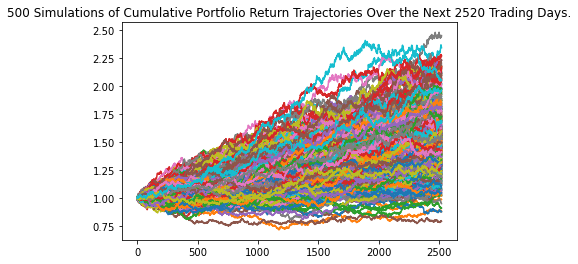

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

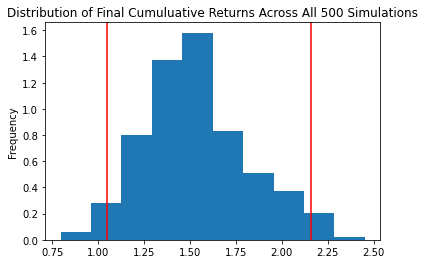

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
